# Reinforcement Learning

Building RL in algorithms in python we can use the open AI gym 

## Return of the Multi-Armed Bandit

Multi-armed bandit problem

Refered to as "Multi arm bandit problem" because when you pull on a slot machine you use your arm and they are reffered to as bandits because they are takong your money.

- Go to a casino and choose between 3 slot machines
- Each slot machine can give you a value (reward) between 0 (lose) and 1 (win) 
- Unknown win rate of a slot machine e.g 0.2,0.4, e.c.t.
- Goal: maximize your reward (win rate)
- Problem: Can only discover the best machine (bandit) by collecting the data
- If you could, you would guess the slot machine (bandit) with the highest win rate (you don't know the true win rate but you need to estimate the win rate of each machine by collecting the data).
-  You find a balance , explore (collecting data) + exploit (playing "best-so-far" machine)


The dilema comes in that you need to collect lots of data to get correct estimates but if you spend a lot of time collecting playing suboptimal bandits. Hence you need to balance the ammount of time trying to maximise your earnings and trying to obtain accurate measurements of each bandits win rate, since in order to maximise your earnings you need to accurately know that information.

https://link.springer.com/article/10.1023%2FA%3A1013689704352

### Traditional A/B testing

A/B testing is a randomized experiment with 2 variants. It includes application in two-sample hypothesis testing. A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B, and determining which of the two variants is more effective.

In traditional A/B testing you would predetermine ahead of time the number if times you need to play each slot machine in order to obtain statistical significance. i.e use bayesian learning with a predetermined prior. The number of times one needs to play is dependent on different factors such as the difference in win rates between each bandit. If the difference is bigger you need less samples , similarly if the difference is smaller you need more samples ( there is an inverse relationship between samples needed and the difference in win rate between samples). However unfortunately you do not know the difference between each test before you commence testing. This is a major disadvantage of traditional A/B testing.

It is also important to note that statistical significance will only be achieved once a certain number of tests have occured in what refer to here as traditional A/B testing i.e we need a large enough sample size.

https://en.wikipedia.org/wiki/A/B_testing

### Behavioural Biases (Behavioural Economics Approach)

This is not the same as human behaviour (emotion) that tends to carry a bias towards taking the most recent result, this is an example of what they refer to in behavioural economics as "anchoring". We know that "Information-processing biases result in information being processed and used illogically or irrationally." Anchoring which is a form of information processing biases can be thought of as when we overly rely on recent information. 

Say I play 2 slot machines 3 times each and win twice on one and zero times on the other. I could beleive that the win rate on one slot machine is 0% and the win rate on the other machine is (2/3) 67% . We know from a statistical point of view this would be incorrect as our sample size is too small and we would need to perform more iterations. 

https://www.cfainstitute.org/en/membership/professional-development/refresher-readings/2020/behavioral-biases-individuals

Perhaps what we need is algorithms that would systematically make an explore-exploit tradeoff. These would hopefully be better than the previour 2 suboptimal solutions to solve our problem and maximize the reward function. 


### Applications of Explore-Exploit

###### 2 advertisement example
- Example
Quantitatively comparing things applies to almost any business. 
    - You have 2 ADs
        - Which one is better? Naturally, the one that will likely lead to more purchases of the product or service. One possible way to meausure this is to determine and measure the click-through-rate (CTR) for each advertisement.
        - $\#$ clicks/ $\#$ impressions, ratio is used to measure CTR.
     - **How do I measure the CTR?**
         - Do an experiment. Show the first advertisement to a sample $n_{1}$ then show the second advertisement to another sample $n_{2}$. 
        2.6 2:50
        

## Epsilon Greedy

The first solution to the explore-exploit dilemma is reffered to as the Epsilon-Greedy strategy. This is the most important as it is the one we will use through out most of our examples. We use a small number, "epsilon", to be the probability of exploration.

In each round we generate a number and if the number is less than epsilon $\epsilon$ , we **explore** (this means we just choose an arm at random). If the random number is greater than epsilon we exploit, meaning we choose the arm that has the best maximum reward rate so far. 

It should be clear that through this we learn which arm is best eventually even though your initial guesses might be wrong. Since every arm always has some chance to get updated. 

https://towardsdatascience.com/solving-multiarmed-bandits-a-comparison-of-epsilon-greedy-and-thompson-sampling-d97167ca9a50


In [1]:
import numpy as np

# Epsilon = 0.05 , i.e 5% , the algorithm will exploit the best variant 95% of the time and 
# will explore random alternatives 5% of the time.
eps = 0.05 

p = np.random.random() 
if p < eps:
    # We explore
    # pull random arm
    arm = "Pull Arm on Random."
else:
    # We exploit, meaning
    # pull current best arm
    arm = "Pull best Arm."
# At some point we will discover which arm is the true best, since it allows us to update every arm's estimate
print(arm," p = ",p)

Pull best Arm.  p =  0.6535963349749504



- Theoreticall in the long run, the algorithm allows us to explore each arm an infinite number of times
- Problem is we will get to a point were the values converge  and you are still exploring whilst you do not need to explore anymore.
- So if epsilon is 10% then you will spend 10% of the time performing a suboptimal task (choosing suboptimal arms)
- An A/B test could be useful here, Where you could do a test at a predetermined time to check for statistical significance. Once you found statistical significance you could change $\epsilon = 0$. When $\epsilon = 0$ you are **effectively only doing the greedy part**. However there may be better ways to adapt in the future.

## Updating a Sample Mean
- Let's assume that the Bandit Rewards are not just coin tosses, what is the best way to keep track of a reward?
- The general method to solve this problem would be to use the arithmetic mean.
- This works for the coin toss problem (binary problem, heads as 1 and tails as 0) as if one had $N$ tosses of a coin you would arrive at the maximum likelihood \bar{X}= \frac{1}{N} \sum_{i=1}^{N} X_{i} probability of getting heads by adding up the total number of heads and dividing it up by $N$.

$$ \bar{X}= \frac{1}{N} \sum_{i=1}^{N} X_{i} $$

- What's the problem with this equation?

The problem with this equation is that it requires you to store all N elements in order to calculate the mean. Let's ask ourselves is there a way to make this calculation more effecient and the answer is yes there is. We can calculate the mean at the $N$'th sample with the mean at the $N-1$'th sample. One can then say that this allows us to calculate the mean in a more computationally efficient way.

$$\begin{align*}
\bar{X}_{N} & = \frac{1}{N} \sum_{i=1}^{N} X_{i} \\&= \frac{1}{N} \sum_{i=1}^{N-1} X_{i} + \frac{1}{N} X_{i} \\& = \frac{N - 1}{N}  \bar{X}_{N-1} + \frac{1}{N} X_{N} \\\bar{X}_{N} & = \left (  1-\frac{1}{N} \right ) \bar{X}_{N-1} + \frac{1}{N} X_{N} \end{align*}$$

This derivation to the form of the updated version is important going further.

https://www.physicsforums.com/threads/updating-the-mean-and-sd-of-a-set-efficiently.526280/

## Designing your own Bandit Program

We will explore several different methods but they are all for solving the same problem.

#### Supervised learning VS Reinforcement Learning

First Lets recap how we would do this in supervised learning (Naive Bayes, Decision Trees, NN, ect...). We will make use of an example coded in python below. The first step is loading the data, followed by intiating the model, training the model and lastly evaluating the model. The job of you as the implementer of the algorithm is to write up the fit and predict functions. This is the case of all supervised learning algorithms, the algorithm changes but the layout remains somewhat the same.

The above is not our outline as we are not at this point intrested in supervised learning but in reinfircement learning. However, that still means that there is a pattern to be followed.

To start we will implement some actual casiono machines. We know that a "a slot machine" is just an analogy for real life applications.

```python
class CasinoMachine:
    def pull:
        # simulates drawing from a true distribution
        # Of course, which we would not know in "real life"
for t in range(max_iterations):
    #pick a casino machine to play based on the algorithm
    #update algorithm parameters
    
# plot useful info (avg reward, best machine, ect.)
```

We need a pull function for your slot machine that returns a sample from the true distribution from wherever your samples are coming from, but remember this is just a simulation, in real life you would plugging it into your ad serving application. The point is that you are sampling using an application which simulates a real life action with a distribution that you do not know the actual true ditribution. Since this is a simulation you actally know this distribution, you just pretend like you do not know it.

With each iteration of this loop you will update your model parameters, once this loop is done you will want to print out information that is useful to you such as the average reward over time in which the slot machine your algorithm discovered is best. You would then want to compare that to the slot machine which is actually best in order to see if your algorithm learned the right answer.

### Comparing Different Epsilons

In this section of the project we ***implement epsilon greedy in code and demonstrate the effect of different values of epsilon***.

We start off with the class "Bandit", the constructor takes in one parameter m. "m" is the true mean. We then set the instance variables "mean" and "N" to zero. The instance variable is our estimate of the bandits mean.

```python
class Bandit:
    def __init__(self, m):  # m is the true mean
        '''
        DOCSTRING:
        Bandit takes in one parameter m, this is the true mean.
        It then sets the instance variables mean and N to zero.
        '''
        self.m = m
        self.mean = 0
        self.N = 0
```

Next we have the pull function which simulates pulling the slot machine's (bandit's) arm. From inspection one can see that every slot machines reward will be a gaussian with unit variates.

```python
    def pull(self): # simulated pulling bandits arm
        '''
        DOCSTRING:
        Simulate pulling the bandits arm (Playing the slot machine).
        Output:
        We generate a random value between 0 and 1 and add it to the true mean.
        '''
        return np.random.randn() + self.m
```

Finally, we make an update with the update function. This function takes in a value 'x' which is the latest sample received from the bandit. Take note of the update equation which we have just discussed.

```python
    def update(self, x):
        '''
        DOCSTRING:
        Update function. Takes in the latest sample received from the bandit "x" and updates our estimate.
        '''
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x  # look at the derivation above of the mean
```

Next, we have the run experiment function which takes the three different means for each slot machine "m1","m2","m3". It has the value 'eps' representing epsilon parsed to it so that we can do epsilon greedy. It also has "N" parsed to it representing the number of times we play. When the function returns we would like it to return the cumulative average after every play. We then compare these plots for different settings of epsilon. We keep the results in an array of size N called data.

Notice the implementation of epsilon greedy inside the loop. This is disscused in the previous example above where we generate a random number **p** between 0 and 1. If $p < \epsilon $ , we choose a random slot machine (bandit at random). If  $p >= \epsilon $ we choose the bandit with the current best sample mean ("m1","m2","m3").

We then pull the chosen bandit and update the bandit of choice with the reward we just got and we save X. When the loop is finished we calculate the cumulative average, followed by plotting the cumulative average along with bars showing each of the means so we can see where our cumulative averages relative to those. This is done on a log scale, so that you can see the fluctuations in earlier rounds more clearly. Lastly we print each of the estimated means for debugging purposes.



```Python
def run_experiment(m1, m2, m3, eps, N):
    '''
    DOCSTRING:
     Run experiment function which takes the three different means for each slot machine "m1","m2","m3". 
     It has the value 'eps' representing epsilon parsed to it so that we can do epsilon greedy. 
     
    INPUT:
    m1 = mean 1 , from bandit 1
    m2 = mean 2 , from bandit 2
    m3 = mean 3 , from bandit 3
    eps = value epsilon used in epsilon greedy
    N = number of times we play
    '''
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    data = np.empty(N)
    
    for i in range(N): # Implement epsilon greedy
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3) # Explore
        else:
            j = np.argmax([b.mean for b in bandits]) # Exploit
        x = bandits[j].pull()  # Pull and update
        bandits[j].update(x)
        
        # Results for the plot
        data[i] = x  # Store the results in an array called data of size N
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)      # Calculate cumulative average
```

In the main section we do the same experiment 3 times, each for different epsilon, $1\%$ , $5\%$ and $10\%$. This is followed by plotting the cumulative averages together, both a log plot and a linear plot. This is as with a log plot all the later data is squished to the right thus making it look like we spent more time being very sub-optimal than we actually do.

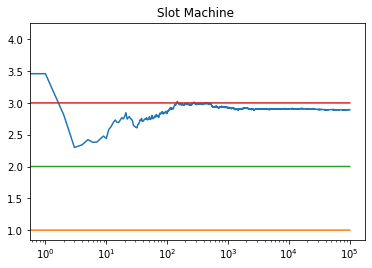

0.9890782467764834
2.006633146506414
2.9963419432853686


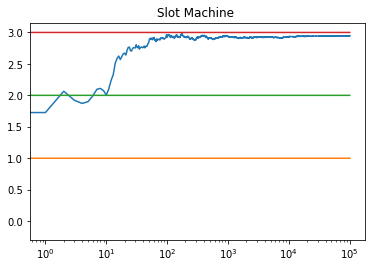

0.9881988670916376
2.033970411925636
2.998347378890055


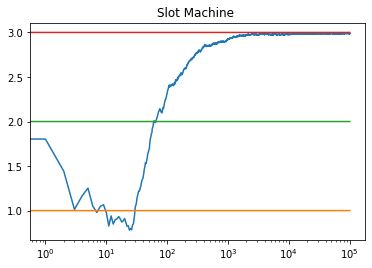

0.9532883888017161
1.9091752343759247
2.9978673144311245


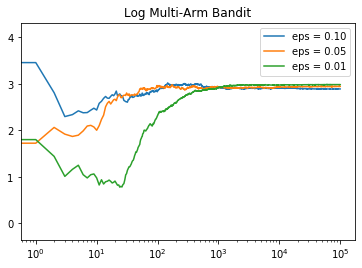

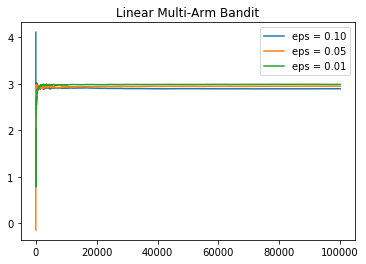

In [6]:
# Premable
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt


class Bandit:
  def __init__(self, m):  # m is the true mean
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self): # simulated pulling bandits arm
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x  # look at the derivation above of the mean


def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N): # Implement epsilon greedy shown above
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3) # Explore
    else:
      j = np.argmax([b.mean for b in bandits]) # Exploit
    x = bandits[j].pull()  # Pull and update
    bandits[j].update(x)

    # Results for the plot
    data[i] = x  # Store the results in an array called data of size N
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)      # Calculate cumulative average
      

  # plot moving average ctr
  plt.plot(cumulative_average) # plot cumulative average
  plt.plot(np.ones(N)*m1) # Plot bars with each of the means so we can see where are cumulative averages relative to means
  plt.title('Slot Machine ')
  plt.plot(np.ones(N)*m2)
  plt.title('Slot Machine ')
  plt.plot(np.ones(N)*m3)
  plt.title('Slot Machine ')
  plt.xscale('log') # We do this on a log scale so that you can see the fluctuations in earlier rounds more clearly
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000) # run_experiment(m1, m2, m3, eps, N):
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.title(label="Log Multi-Arm Bandit")
  plt.plot(c_1, label='eps = 0.10')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.title(label="Linear Multi-Arm Bandit")
  plt.plot(c_1, label='eps = 0.10')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

The first plot is when $\epsilon = .1 $, followed by  $\epsilon = .05 $ and lastly  $\epsilon = .01 $. The linear plot is then shown and lastly the log transformed plot is shown.

### Optimistic Initial Value method

- This is another way to solve the explore-exploit dilemma.
- Suppose we knew the true mean of each bandit is much less than 10 (i.e $<<10$) . The idea is to pick a high ceiling as your initial mean estimate of the bandit mean and then do your update based on that.
$$ \begin{matrix}
\text{Before} &  &  & \text{After}\\ 
\bar{X}_{0}=0 &  &  & \bar{X}_{0}=10
\end{matrix} $$
  One refers to this as optimistic because the inital value of the sample mean is too good to be true. Since it is too good to be true the only thing that could ever happen is that it will only go down (i.e. Initial sample mean is optamistic, all collected data will cause it to go down).



Optimistic Initial Values

If the true mean is 1 then $\bar{X} \rightarrow   1 $ (sample mean will converge to 1) as $n \rightarrow  \infty $. Eventually all the (estimates) means will converge towards their true values as our $n$ grows at which point we will just be exploiting (exploration).


It should be clear that the growing of our sample size helps exploration as well. If you have not explored a bandit much then its intial mean is going to be high due to its initial setting. In fact its going to be higher than everything else, causing you to explore it more (as opposed to exploiting it). In the main loop you'll use the greedy strategy only but using optimistic means.

There are only 2 main code changes to make to the epsilon greedy strategy's code to make this work.

- Only 2 main code changes
    - first we set the initial setting of the mean (to ten)
    - secondly we remove the epsilon part and just do the greedy part


Change 1:
```Python
class Bandit:
    def __init__(self, m, upper_limit):
        self.m=m
        self.mean=upper_limit
        self.N=1
```
Change 2:

```Python
for i in xrange(N):
    #optimistic initial values
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)
```
    # Note: In Python 3, there is no xrange , but the range function behaves like xrange in Python 2.

Below we provide the new code for the optimistic value method:

In [17]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps


class Bandit:
  def __init__(self, m, upper_limit):
    self.m = m
    self.mean = upper_limit
    self.N = 1

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def run_experiment(m1, m2, m3, N, upper_limit=10):
  bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

if __name__ == '__main__':
  c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
  oiv = run_experiment(1.0, 2.0, 3.0, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.show()

ModuleNotFoundError: No module named 'comparing_epsilons'

##### What is Reinforcement Learning?

    - How is it different from supervised and unsupervised learning?
    - What are it's applications?


   - Supervised Learning
   - Unsupervised Learning
   - Reinforcement learning

First thing you will notice is how different RL is from supervised and unsupervised ML.

On a graph RL has a very different paradigm to supervised learning and unsupervised learning, which are much closer in paradigm. Some examples of RL are playing games such as Tic-tac-toe, Go and Chess. A different example is playing video games such as Super Mario, Doom and Star Craft. You can see how RL does things that sound a lot like things that humans can do which can be very dynamic whereas supervised learning and unsupervised learning sound like very simplistic static tasks which are unchanging.
